In [23]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #"last expr -> all로 바꾸면 전체가 나온다. "
pd.options.display.max_columns = 200
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = 100

In [24]:
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Lambda
from keras.layers.wrappers import TimeDistributed
from keras.optimizers import RMSprop,adam
from keras.callbacks import History
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from keras_radam import RAdam
from keras import layers
import keras


In [3]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from keras.models import model_from_json 

In [4]:
from keras.models import model_from_json 

In [8]:
from big_generator import file_generator 
from big_generator import file_generator_valid
from big_generator import file_generator_cul
from big_generator import generator_cul

In [10]:
baseline = pd.read_csv("../learning/datafile/pd_baseline.csv")
baseline=baseline.drop(["Unnamed: 0"], axis=1)

In [12]:
baseline.head()

,idx,admday,opday,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
0,1166795967,20160815,20160816,1,1,0,0,0,0.413528,-1.099884,-1.087010,0.718659,0.324344,-0.807898,-2.006887,-0.548219,-1.284691,0.522189,6.899251,0.000000,25.689499,5.359809,9.749975,3.880541,5.110438,3.511160,4.511642,4.585694,4.943656,6.817242,8.336339,0.469939,0.744466,0.843393,0.651387,0.364311,2.386570,2.788405,2.472394,2.965544,2.699179
1,1166798192,20080712,20080714,0,0,1,0,0,0.954871,1.134563,1.207545,-0.929201,-1.071646,-1.836597,-1.640118,-1.309416,-0.516697,1.730198,0.000000,23.324238,4.610660,10.773179,8.050953,9.421379,4.675070,4.939130,6.741050,4.571187,15.599707,2.511181,9.069263,0.469939,0.744466,0.843393,0.651387,0.364311,4.311703,2.793397,2.057836,4.779967,2.363882
2,1166798478,20110510,20110513,0,0,0,1,0,0.684199,-0.976661,-0.954782,0.012433,2.278730,-1.420494,-1.786826,-0.979085,-0.708695,1.181103,5.156261,16.632401,14.205712,10.985126,23.161686,4.702001,4.761768,0.952568,8.202775,10.063358,6.281622,3.439430,1.209064,0.469939,0.744466,0.843393,0.651387,0.364311,2.386570,2.788405,2.472394,2.965544,2.699179
3,1166799387,20150319,20150324,1,0,0,1,0,0.503752,-1.214892,-1.242573,-0.458384,-0.140986,0.405736,0.780561,0.256065,0.891293,-0.246544,5.156261,16.632401,14.205712,10.985126,23.161686,4.702001,4.761768,0.952568,8.202775,10.063358,6.281622,3.439430,1.209064,0.469939,0.744466,0.843393,0.651387,0.364311,2.386570,2.788405,2.472394,2.965544,2.699179
4,1166799993,20151218,20151228,1,0,1,0,0,0.142857,0.649885,0.663074,0.130138,-0.792448,0.567554,0.560499,-0.318424,-0.836695,-1.674190,0.000000,11.490709,11.508369,6.690341,7.921564,8.227402,4.967529,2.086301,3.116609,7.571434,8.872069,4.365661,11.989615,0.469939,0.744466,0.843393,0.651387,0.364311,3.293770,1.712832,1.584709,6.133195,4.380298


### data load

In [15]:
import pickle
import os
positive_folder = '../learning/dataset/time3_pos_total200107/'
negative_folder = '../learning/dataset/time3_neg_total200107/'

In [16]:
with open(positive_folder+"list_time_X.txt", "rb") as fp:
    list_time_X=pickle.load( fp)
with open(positive_folder+"list_time_y.txt", "rb") as fp:
    list_time_y=pickle.load( fp)
with open(positive_folder+"list_time_static.txt", "rb") as fp:
    list_time_static=pickle.load( fp)
with open(positive_folder+"valid_time_X.txt", "rb") as fp:
    valid_time_X=pickle.load( fp)
with open(positive_folder+"valid_time_y.txt", "rb") as fp:
    valid_time_y=pickle.load( fp)
with open(positive_folder+"valid_time_static.txt", "rb") as fp:
    valid_time_static=pickle.load( fp)
with open(positive_folder+"test_time_X.txt", "rb") as fp:
    test_time_X=pickle.load( fp)
with open(positive_folder+"test_time_y.txt", "rb") as fp:
    test_time_y=pickle.load( fp)
with open(positive_folder+"test_time_static.txt", "rb") as fp:
    test_time_static=pickle.load( fp)

with open(negative_folder+"list_time_Xn.txt", "rb") as fp:
    list_time_Xn=pickle.load( fp)
with open(negative_folder+"list_time_yn.txt", "rb") as fp:
    list_time_yn=pickle.load( fp)
with open(negative_folder+"list_time_nstatic.txt", "rb") as fp:
    list_time_nstatic=pickle.load( fp)

with open(negative_folder+"valid_time_Xn.txt", "rb") as fp:
    valid_time_Xn=pickle.load( fp)
with open(negative_folder+"valid_time_yn.txt", "rb") as fp:
    valid_time_yn=pickle.load( fp)
with open(negative_folder+"valid_time_staticn.txt", "rb") as fp:
    valid_time_staticn=pickle.load( fp)
with open(negative_folder+"test_time_Xn.txt", "rb") as fp:
    test_time_Xn=pickle.load( fp)
with open(negative_folder+"test_time_yn.txt", "rb") as fp:
    test_time_yn=pickle.load( fp)
with open(negative_folder+"test_time_staticn.txt", "rb") as fp:
    test_time_staticn=pickle.load( fp)

In [17]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, window,  time_it, feature,
                 true_X_time, true_X_static,true_y_total,
                 false_X_time, false_X_static, false_y_total,
                 list_time_Xn, list_time_yn, list_time_nstatic,
                size, fraction, ratio, repeat):
        'Initialization'
        self.window = window
        self.time_it = time_it
        self.feature = feature
        self.true_X_time = true_X_time
        self.true_X_static = true_X_static
        self.true_y_total = true_y_total
        self.false_X_time = false_X_time
        self.false_X_static = false_X_static
        self.false_y_total = false_y_total
        self.list_time_Xn = list_time_Xn
        self.list_time_yn = list_time_yn
        self.list_time_nstatic = list_time_nstatic
        self.size = size
        self.fraction = fraction
        self.ratio = ratio
        self.repeat = repeat

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_time_Xn) / 40))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        file_generator1 = file_generator(window = self.window,
                                       time_it =self.time_it,
                                       feature = self.feature,
                                       true_X_time = self.true_X_time,
                                       true_X_static = self.true_X_static,
                                       true_y_total = self.true_y_total,

                                       false_X_time = self.false_X_time,
                                       false_X_static = self.false_X_static,
                                       false_y_total = self.false_y_total,

                                       list_time_Xn = self.list_time_Xn,
                                       list_time_yn = self.list_time_yn,
                                       list_time_nstatic = self.list_time_nstatic,
                                        random_sampling_size = self.size,
                                         fraction_per_case = self.fraction,
                                         true_false_ratio = self.ratio,
                                        repeat = self.repeat)
        # Generate data
        batch_X, batch_static_X, batch_y = file_generator1.get_data(index)

        return ({"time":batch_X, "static":batch_static_X}, batch_y)

### All the time_it, window

In [18]:
time_it = 0
window = 30
# windows = [3,6,12,18,24,30,36]
feature = 100



activation_set = [['tanh','relu','tanh','relu','sigmoid'],
                 ['relu','relu','relu','relu','sigmoid']]
                 
learning_rate = (0.003,0.0003)

# layer_set = ((16,8,8,16),
#             (16,8,8,8),
#             (8,8,8,8),
#             (32,16,16,16),
#             (32,16,8,16),
#             (128,128,128,64))

layer_set = ((32,16,16,16),
            (32,16,8,16),
            (128,128,128,64),
            (256,128,256,128))

history1 = []
history_val_auc = []
history_val_precision = []
history_test_auc = []
history_test_precision = []


In [20]:
file_foler = './train/'
if not os.path.exists(file_foler):
  os.mkdir(file_foler)

In [21]:
# for window in windows:
def time_series_generator(x,y):
    Xn=[]
    yn=[]
    for n in range(len(x)-time_it):
        if n+1>window:
            X_train=x[n+1-window:n+1]
        else:
            X_train=x[0:n+1]
            X_train=np.pad(X_train, mode='constant', pad_width=((0,window-X_train.shape[0]),(0,0)),\
                           constant_values=-5)

        Xn.append(X_train)
        y_train=y[n+time_it]
        yn.append(y_train)

    return Xn, yn

Xt_time = []
Xt_static = []
yt_time = []

## positive data gathering
for idx in range(len(list_time_X)):
    Xt_time_i = list_time_X[idx]
    yt_time_i = list_time_y[idx]
    Xt, yt = time_series_generator(Xt_time_i,yt_time_i)
    time_static_data = list_time_static[idx]

    for n in range(len(Xt)):
        Xt_time.append(Xt[n])
        Xt_static.append(time_static_data)
        yt_time.append(yt[n])

positive_index = [i for i,result in enumerate(yt_time) if result==1]
negative_index = [i for i,result in enumerate(yt_time) if result==0]

positive_x = [Xt_time[idx] for idx in positive_index]
positive_x_static = [Xt_static[idx] for idx in positive_index]
positive_y = [yt_time[idx] for idx in positive_index]

negative_x = [Xt_time[idx] for idx in negative_index]
negative_x_static = [Xt_static[idx] for idx in negative_index]
negative_y = [yt_time[idx] for idx in negative_index]

true_X_time = np.array(positive_x, dtype="float32").reshape(-1,window,feature)
true_X_static = np.array(positive_x_static, dtype="float32").reshape(-1,38)
true_y_total = np.array(positive_y, dtype="float32").reshape(-1,)
false_X_time = np.array(negative_x, dtype="float32").reshape(-1,window,feature)
false_X_static = np.array(negative_x_static, dtype="float32").reshape(-1,38)
false_y_total = np.array(negative_y, dtype="float32").reshape(-1,)

def val_generator(x,y):
    Xn=[]
    yn=[]
    for n in range(len(x)-time_it):
        if n+1>window:
            X_train=x[n+1-window:n+1]
        else:
            X_train=x[0:n+1]
            X_train=np.pad(X_train, mode='constant', pad_width=((0,window-X_train.shape[0]),(0,0)),\
                           constant_values=-5)

        Xn.append(X_train)
        y_train=y[n+time_it]
        yn.append(y_train)

    return Xn, yn

val_Xt_time = []
val_Xt_static = []
val_yt_time = []

## positive data gathering
for idx in range(len(valid_time_X)):
    Xt_time_i = valid_time_X[idx]
    yt_time_i = valid_time_y[idx]
    Xt, yt = val_generator(Xt_time_i,yt_time_i)
    time_static_data = valid_time_static[idx]

    for n in range(len(Xt)):
        val_Xt_time.append(Xt[n])
        val_Xt_static.append(time_static_data)
        val_yt_time.append(yt[n])

val_positive_index = [idx for idx,result in enumerate(val_yt_time) if result==1]
val_negative_index = [idx for idx,result in enumerate(val_yt_time) if result==0]

val_positive_x = [val_Xt_time[idx] for idx in val_positive_index]
val_positive_x_static = [val_Xt_static[idx] for idx in val_positive_index]
val_positive_y = [val_yt_time[idx] for idx in val_positive_index]

val_negative_x = [val_Xt_time[idx] for idx in val_negative_index]
val_negative_x_static = [val_Xt_static[idx] for idx in val_negative_index]
val_negative_y = [val_yt_time[idx] for idx in val_negative_index]

val_true_X_time = np.array(val_positive_x, dtype="float32").reshape(-1,window,feature)
val_true_X_static = np.array(val_positive_x_static, dtype="float32").reshape(-1,38)
val_true_y_total = np.array(val_positive_y, dtype="float32").reshape(-1,)
val_false_X_time = np.array(val_negative_x, dtype="float32").reshape(-1,window,feature)
val_false_X_static = np.array(val_negative_x_static, dtype="float32").reshape(-1,38)
val_false_y_total = np.array(val_negative_y, dtype="float32").reshape(-1,)

### valid data generator

test_generator = file_generator_valid(window = window,
                                       time_it =time_it, 
                                       feature = feature,
                                       list_time_Xt = test_time_X, 
                                       list_time_yt = test_time_y, 
                                       list_time_tstatic = test_time_static, 
                                       list_time_Xn = test_time_Xn, 
                                       list_time_yn = test_time_yn, 
                                       list_time_nstatic = test_time_staticn)

test_X, test_static_X, test_y = test_generator.get_data()

params = {"window" : window,
           "time_it" :time_it, 
          "feature": feature,
           "true_X_time" : true_X_time, 
           "true_X_static" : true_X_static, 
           "true_y_total" : true_y_total, 

           "false_X_time" : false_X_time, 
           "false_X_static" : false_X_static, 
           "false_y_total" : false_y_total, 

           "list_time_Xn" : list_time_Xn, 
           "list_time_yn" : list_time_yn, 
           "list_time_nstatic" : list_time_nstatic,
           "size" : 2500,
           "fraction" : 0.2,
            "ratio" : 1,
           "repeat":3}
valparams = {"window" : window,
           "time_it" :time_it, 
          "feature": feature,
           "true_X_time" : val_true_X_time, 
           "true_X_static" : val_true_X_static, 
           "true_y_total" : val_true_y_total, 

           "false_X_time" : val_false_X_time, 
           "false_X_static" : val_false_X_static, 
           "false_y_total" : val_false_y_total, 

           "list_time_Xn" : valid_time_Xn, 
           "list_time_yn" : valid_time_yn, 
           "list_time_nstatic" : valid_time_staticn,
            "size" : 600,
            "fraction" : 0.2,
             "ratio" : 1,
            "repeat":3}

filepath = ".hdf5"


traingen = DataGenerator(**params)
valid_gen = DataGenerator(**valparams)

In [26]:
#GRU layer
time_input= Input(shape=(None, feature), name='time')
x0=layers.Masking(mask_value=-5)(time_input)

x1=layers.Dense(layer_set[1][0], activation=activation_set[0][0])(x0)
x11=layers.BatchNormalization()(x1)
x12=layers.Dropout(0.5)(x11)

x2=layers.GRU(layer_set[1][1], activation=activation_set[0][1], return_sequences=False)(x12)
# x3 = layers.Dense(8)(x2)
x4=layers.BatchNormalization()(x2)
x5=layers.Dropout(0.5)(x4)
# x6=layers.Dense(64)(x5)
#static layer
static_input=Input(shape=(38,),  name='static')
x31 = layers.Dense(layer_set[1][2],activation=activation_set[0][2])(static_input)
x32=layers.BatchNormalization()(x31)
x33=layers.Dropout(0.5)(x32)
#합친 모양
concatenated = layers.concatenate([x5,x33], axis=-1)

x7=layers.Dense(layer_set[1][3], activation=activation_set[0][3])(concatenated)
x8=layers.BatchNormalization()(x7)
x9=layers.Dropout(0.5)(x8)
x10=layers.Dense(1, activation=activation_set[0][4])(x9)

model=Model([time_input,static_input], x10)
model.compile(loss="binary_crossentropy", optimizer=adam(lr=learning_rate[j]), metrics=['accuracy'])

MODEL_SAVE_FOLDER_PATH = file_foler+'_{}_{}_{}/'.format(0,1,1)
filename = 'rnn_{}_{}_{}'.format(0,1,1)
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + filename+filepath
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=0,
                             save_best_only=True, mode='min')

rnn_operating_code=model.to_json()
with open(MODEL_SAVE_FOLDER_PATH+filename+".json", "w") as json_file : 
    json_file.write(rnn_operating_code)
history = History()
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=2, mode='auto')

rnn_train = model.fit_generator(generator= traingen,
                                 validation_data= valid_gen,
                                steps_per_epoch=int(np.floor(len(baseline)*0.8/1300)),
                                validation_steps=10,
                                nb_epoch = 500, verbose=1, 
                                callbacks = [history, checkpoint
                                             ,early_stopping
                                            ],
                                workers=-1, use_multiprocessing=True
                               )

7251

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 36s 2s/step - loss: 0.7523 - acc: 0.6346 - val_loss: 0.3335 - val_acc: 0.8680
Epoch 2/500
22/22 [==============================] - 35s 2s/step - loss: 0.4884 - acc: 0.8038 - val_loss: 0.3065 - val_acc: 0.8697
Epoch 3/500
22/22 [==============================] - 35s 2s/step - loss: 0.3834 - acc: 0.8700 - val_loss: 0.2889 - val_acc: 0.8803
Epoch 4/500
22/22 [==============================] - 34s 2s/step - loss: 0.3211 - acc: 0.8909 - val_loss: 0.2671 - val_acc: 0.9050
Epoch 5/500
22/22 [==============================] - 34s 2s/step - loss: 0.2861 - acc: 0.8999 - val_loss: 0.2733 - val_acc: 0.9005
Epoch 6/500
22/22 [==============================] - 34s 2s/step - loss: 0.2613 - acc: 0.9052 - val_loss: 0.2811 - val_acc: 0.8926
Epoch 7/500
22/22 [==============================] - 34s 2s/step - loss: 0.2455 - acc: 0.9084 - val_loss: 0.2668 - val_acc: 0.8950
Epoch 8/500
22/22 [==============================] - 35s 2s/step - loss: 0.2320 - a

In [37]:
json_file = open(MODEL_SAVE_FOLDER_PATH+filename+".json", "r")
loaded_model_json = json_file.read() 
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.compile(loss="binary_crossentropy", optimizer=adam(lr=.003), metrics=['accuracy'])
loaded_model.load_weights(model_path)

model_test = loaded_model.predict({"time":test_X, "static":test_static_X})
roc_val_test = roc_auc_score(test_y, model_test)
#mAP
test_precision = average_precision_score(test_y, model_test)

print("AUROC of model : ",roc_val_test)
print("AUPRC of model : ", test_precision)

AUROC of model :  0.9780392439841585
AUPRC of model :  0.17217443445493316


In [32]:
table=pd.read_csv("table.csv")

In [38]:
SIRS_sensitivity = table.loc[table['criteria']=="SIRS(score)"].sensitivity
SIRS_specificity = table.loc[table['criteria']=="SIRS(score)"].specificity
SIRS_precision = table.loc[table['criteria']=="SIRS(score)"].precision
mews_sen =table.loc[table['criteria']=="mews(score)"].sensitivity
mews_spe = table.loc[table['criteria']=="mews(score)"].specificity
mews_pre = table.loc[table['criteria']=="mews(score)"].precision
sofa_sen = table.loc[table['criteria']=="sofa(score)_x"].sensitivity
sofa_spe = table.loc[table['criteria']=="sofa(score)_x"].specificity
sofa_pre = table.loc[table['criteria']=="sofa(score)_x"].precision

In [39]:
SIRS_precision

0    0.001999
1    0.004749
2    0.011343
3    0.029098
4    0.051306
Name: precision, dtype: float64

<Figure size 360x360 with 0 Axes>

Text(0.6, 0.02, 'SOFA')

Text(0.463, 0.03, 'SIRS')

Text(0.116, 0.05, 'MEWS')

Text(0.5, 0, 'Sensitivity (recall)')

Text(0, 0.5, 'Positive predictive value (precision)')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 1.0, 'Precision-Recall curve')

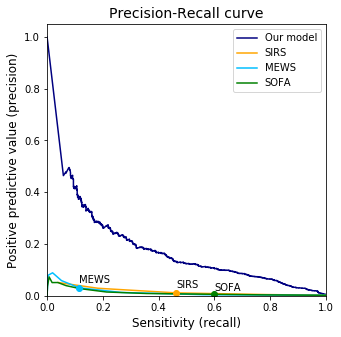

In [40]:
average_precision = average_precision_score(test_y, model_test)

precision, recall, _ = precision_recall_curve(test_y, model_test)
# precision, recall, _ = precision_recall_curve(a2, y_pred_val)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=[5,5])
plt.plot(recall, precision, color='navy', label = "Our model")
plt.plot(SIRS_sensitivity, SIRS_precision, 'orange', label = "SIRS")
plt.plot(mews_sen, mews_pre, "deepskyblue", label = "MEWS")
plt.plot(sofa_sen, sofa_pre, "green", label = "SOFA")
#SOFA click
plt.plot(0.60, 0.006, 'green', marker='o')
plt.annotate("SOFA",(0.6, 0.02))
#SIRS click
plt.plot(0.463, 0.011, 'orange', marker='o')
plt.annotate("SIRS",(0.463, 0.03))
#MEWS click
plt.plot(0.116, 0.031, 'deepskyblue', marker='o')
plt.annotate("MEWS",(0.116, 0.05))

plt.xlabel('Sensitivity (recall)', fontsize= 12)
plt.ylabel('Positive predictive value (precision)', fontsize= 12)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve', fontsize= 14)
plt.legend()

<Figure size 360x360 with 0 Axes>

Text(0.22799999999999998, 0.57, 'SOFA')

Text(0.020000000000000018, 0.48, 'SIRS')

Text(0.020000000000000018, 0.116, 'MEWS')

(0.0, 1.05)

(0.0, 1.0)

Text(0.5, 0, '1-specificity')

Text(0, 0.5, 'sensitivity')

Text(0.5, 1.0, 'AUROC curve')

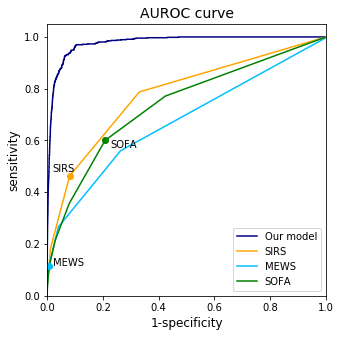

In [41]:

fpr, tpr, _ = roc_curve(test_y, model_test)
auc = np.trapz(tpr,fpr)

# Print ROC curve
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(figsize=[5,5])
plt.plot(fpr, tpr, color='navy', label="Our model")
plt.plot((1-SIRS_specificity), SIRS_sensitivity , 'orange', label = "SIRS")
plt.plot((1-mews_spe), mews_sen, "deepskyblue", label = "MEWS")
plt.plot((1-sofa_spe), sofa_sen, "green", label = "SOFA")

#SOFA click
plt.plot((1-0.792), 0.600, 'green', marker = 'o')
plt.annotate("SOFA",((1-0.772), 0.57))
#SIRS click
plt.plot((1-0.919), 0.463, 'orange', marker = 'o')
plt.annotate("SIRS",((1-0.98), 0.48))
#MEWS click
plt.plot((1-0.993), 0.116, 'deepskyblue', marker = "o")
plt.annotate("MEWS",((1-0.98), 0.116))

plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.xlabel('1-specificity', fontsize= 12)
plt.ylabel('sensitivity', fontsize= 12)
plt.legend()

plt.title('AUROC curve', fontsize= 14)
plt.savefig(MODEL_SAVE_FOLDER_PATH+filename+'roc.png')




### model evaluation

### occlusion analysis
list of column
* "Vital_Sign"
* "hct"
* "Electrolyte"
* "Kidney related value"
* "Inflammatory_marker"
* "WBC"
* "ABGA"
* "Liver_function_test"
* time-invariant 

In [42]:
test_generator = file_generator_valid(window = window,
                                       time_it =time_it, 
                                       feature = feature,
                                       list_time_Xt = test_time_X, 
                                       list_time_yt = test_time_y, 
                                       list_time_tstatic = test_time_static, 
                                       list_time_Xn = test_time_Xn, 
                                       list_time_yn = test_time_yn, 
                                       list_time_nstatic = test_time_staticn)

test_X, test_static_X, test_y = test_generator.get_data()

In [53]:

start = [4,16,28,40,52,64,76,88]
n=12

original_test_X = test_X.copy()

In [66]:
outcome_result = []
list_of_column = ["Vital_Sign","hct","Electrolyte","Kidney related value","Inflammatory_marker",
                 "WBC","ABGA","Liver_function_test"]
number = 0
for point in start:
    test_X = original_test_X.copy()
    test_X[:,:,point:point+n][test_X[:,:,point:point+n]!=-5]=0
    model_test = loaded_model.predict({"time":test_X, "static":test_static_X})
    roc_val_test = roc_auc_score(test_y, model_test)
    test_precision = average_precision_score(test_y, model_test)

    # roc_val, average_precision, 
    outcome_result.append({"group":list_of_column[number],
                           "AUROC":roc_val_test ,
                           "AUPRC":test_precision})
    number +=1

In [68]:
occluding_X=test_static_X.copy()
occluding_X[:]=0

In [69]:
#AUROC
# model_val = loaded_model.predict({"time":valid_X, "static":valid_static_X})
# roc_val = roc_auc_score(valid_y, model_val)
model_test = loaded_model.predict({"time":test_X, "static":occluding_X})
roc_val_test = roc_auc_score(test_y, model_test)
#mAP
# average_precision = average_precision_score(valid_y, model_val)
test_precision = average_precision_score(test_y, model_test)

# roc_val, average_precision, 
roc_val_test , test_precision

(0.9689598913542313, 0.14265733519591678)

In [72]:
outcome_result.append({"group":"time_invariant_value",
                     "AUROC":roc_val_test,
                     "AUPRC":test_precision})
pd.DataFrame(outcome_result).sort_values("AUPRC")

,group,AUROC,AUPRC
0,Vital_Sign,0.854117,0.051757
3,Kidney related value,0.946621,0.064617
5,WBC,0.955581,0.075492
2,Electrolyte,0.962377,0.107562
1,hct,0.965683,0.108604
6,ABGA,0.968850,0.124117
4,Inflammatory_marker,0.975475,0.139766
8,time_invariant_value,0.968960,0.142657
7,Liver_function_test,0.976142,0.150692


In [77]:
fpr, tpr, thresholds =roc_curve(test_y, model_test)
# roc_auc = auc(fpr, tpr)

i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.ix[(roc.tf-0).abs().argsort()[:1]]

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,fpr,tpr,1-fpr,tf,thresholds
3940,0.084781,0.915222,0.915219,0.000002,0.081195


In [ ]:
roc.ix[(roc.tf-0).abs().argsort()[:100]]

In [78]:
precision, recall, thresholds = precision_recall_curve(test_y, model_test)
# roc_auc = auc(precision, recall)

i = np.arange(len(recall)-1) # index for df
PRgraph = pd.DataFrame({'precision' : pd.Series(precision[:-1], index=i),'recall' : pd.Series(recall[:-1], index = i), '1-recall' : pd.Series(1-recall[:-1], index = i), 'tf' : pd.Series(recall[:-1] - (1-precision[:-1]), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
PRgraph.ix[(PRgraph.precision==0.05)]

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


,precision,recall,1-recall,tf,thresholds
108058,0.05,0.693642,0.306358,-0.256358,0.564122


### 8hour, 16hour prediction 

In [48]:
import pickle
import os
positive_folder = './dataset/time3_pos_total200107/'
negative_folder = './dataset/time3_neg_total200107/'

In [49]:
with open(positive_folder+"list_time_X.txt", "rb") as fp:
    list_time_X=pickle.load( fp)
with open(positive_folder+"list_time_y.txt", "rb") as fp:
    list_time_y=pickle.load( fp)
with open(positive_folder+"list_time_static.txt", "rb") as fp:
    list_time_static=pickle.load( fp)
with open(positive_folder+"valid_time_X.txt", "rb") as fp:
    valid_time_X=pickle.load( fp)
with open(positive_folder+"valid_time_y.txt", "rb") as fp:
    valid_time_y=pickle.load( fp)
with open(positive_folder+"valid_time_static.txt", "rb") as fp:
    valid_time_static=pickle.load( fp)
with open(positive_folder+"test_time_X.txt", "rb") as fp:
    test_time_X=pickle.load( fp)
with open(positive_folder+"test_time_y.txt", "rb") as fp:
    test_time_y=pickle.load( fp)
with open(positive_folder+"test_time_static.txt", "rb") as fp:
    test_time_static=pickle.load( fp)

with open(negative_folder+"list_time_Xn.txt", "rb") as fp:
    list_time_Xn=pickle.load( fp)
with open(negative_folder+"list_time_yn.txt", "rb") as fp:
    list_time_yn=pickle.load( fp)
with open(negative_folder+"list_time_nstatic.txt", "rb") as fp:
    list_time_nstatic=pickle.load( fp)

with open(negative_folder+"valid_time_Xn.txt", "rb") as fp:
    valid_time_Xn=pickle.load( fp)
with open(negative_folder+"valid_time_yn.txt", "rb") as fp:
    valid_time_yn=pickle.load( fp)
with open(negative_folder+"valid_time_staticn.txt", "rb") as fp:
    valid_time_staticn=pickle.load( fp)
with open(negative_folder+"test_time_Xn.txt", "rb") as fp:
    test_time_Xn=pickle.load( fp)
with open(negative_folder+"test_time_yn.txt", "rb") as fp:
    test_time_yn=pickle.load( fp)
with open(negative_folder+"test_time_staticn.txt", "rb") as fp:
    test_time_staticn=pickle.load( fp)

In [39]:

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, window,  time_it, feature,
                 true_X_time, true_X_static,true_y_total,
                 false_X_time, false_X_static, false_y_total,
                 list_time_Xn, list_time_yn, list_time_nstatic,
                size, fraction, ratio, repeat):
        'Initialization'
        self.window = window
        self.time_it = time_it
        self.feature = feature
        self.true_X_time = true_X_time
        self.true_X_static = true_X_static
        self.true_y_total = true_y_total
        self.false_X_time = false_X_time
        self.false_X_static = false_X_static
        self.false_y_total = false_y_total
        self.list_time_Xn = list_time_Xn
        self.list_time_yn = list_time_yn
        self.list_time_nstatic = list_time_nstatic
        self.size = size
        self.fraction = fraction
        self.ratio = ratio
        self.repeat = repeat

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_time_Xn) / 40))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        file_generator1 = file_generator(window = self.window,
                                       time_it =self.time_it,
                                       feature = self.feature,
                                       true_X_time = self.true_X_time,
                                       true_X_static = self.true_X_static,
                                       true_y_total = self.true_y_total,

                                       false_X_time = self.false_X_time,
                                       false_X_static = self.false_X_static,
                                       false_y_total = self.false_y_total,

                                       list_time_Xn = self.list_time_Xn,
                                       list_time_yn = self.list_time_yn,
                                       list_time_nstatic = self.list_time_nstatic,
                                        random_sampling_size = self.size,
                                         fraction_per_case = self.fraction,
                                         true_false_ratio = self.ratio,
                                        repeat = self.repeat)
        # Generate data
        batch_X, batch_static_X, batch_y = file_generator1.get_data(index)

        return ({"time":batch_X, "static":batch_static_X}, batch_y)

In [42]:
file_foler = './window_200119/'
if not os.path.exists(file_foler):
  os.mkdir(file_foler)

In [50]:
time_it = 0
windows = [3,6,12,18,24,30,36]
feature = 100



activation_set = [['tanh','relu','tanh','relu','sigmoid'],
                 ['relu','relu','relu','relu','sigmoid']]
                 
learning_rate = (0.003,0.0003)

# layer_set = ((16,8,8,16),
#             (16,8,8,8),
#             (8,8,8,8),
#             (32,16,16,16),
#             (32,16,8,16),
#             (128,128,128,64))

layer_set = ((32,16,16,16),
            (32,16,8,16),
            (128,128,128,64),
            (256,128,256,128))

history1 = []
history_val_auc = []
history_val_precision = []
history_test_auc = []
history_test_precision = []

activation_i = 0
activation_j = 1
activation_k = 1

In [51]:
for window in windows:
    def time_series_generator(x,y):
        Xn=[]
        yn=[]
        for n in range(len(x)-time_it):
            if n+1>window:
                X_train=x[n+1-window:n+1]
            else:
                X_train=x[0:n+1]
                X_train=np.pad(X_train, mode='constant', pad_width=((0,window-X_train.shape[0]),(0,0)),\
                               constant_values=-5)

            Xn.append(X_train)
            y_train=y[n+time_it]
            yn.append(y_train)

        return Xn, yn

    Xt_time = []
    Xt_static = []
    yt_time = []

    ## positive data gathering
    for idx in range(len(list_time_X)):
        Xt_time_i = list_time_X[idx]
        yt_time_i = list_time_y[idx]
        Xt, yt = time_series_generator(Xt_time_i,yt_time_i)
        time_static_data = list_time_static[idx]

        for n in range(len(Xt)):
            Xt_time.append(Xt[n])
            Xt_static.append(time_static_data)
            yt_time.append(yt[n])

    positive_index = [i for i,result in enumerate(yt_time) if result==1]
    negative_index = [i for i,result in enumerate(yt_time) if result==0]

    positive_x = [Xt_time[idx] for idx in positive_index]
    positive_x_static = [Xt_static[idx] for idx in positive_index]
    positive_y = [yt_time[idx] for idx in positive_index]

    negative_x = [Xt_time[idx] for idx in negative_index]
    negative_x_static = [Xt_static[idx] for idx in negative_index]
    negative_y = [yt_time[idx] for idx in negative_index]

    true_X_time = np.array(positive_x, dtype="float32").reshape(-1,window,feature)
    true_X_static = np.array(positive_x_static, dtype="float32").reshape(-1,38)
    true_y_total = np.array(positive_y, dtype="float32").reshape(-1,)
    false_X_time = np.array(negative_x, dtype="float32").reshape(-1,window,feature)
    false_X_static = np.array(negative_x_static, dtype="float32").reshape(-1,38)
    false_y_total = np.array(negative_y, dtype="float32").reshape(-1,)

    def val_generator(x,y):
        Xn=[]
        yn=[]
        for n in range(len(x)-time_it):
            if n+1>window:
                X_train=x[n+1-window:n+1]
            else:
                X_train=x[0:n+1]
                X_train=np.pad(X_train, mode='constant', pad_width=((0,window-X_train.shape[0]),(0,0)),\
                               constant_values=-5)

            Xn.append(X_train)
            y_train=y[n+time_it]
            yn.append(y_train)

        return Xn, yn

    val_Xt_time = []
    val_Xt_static = []
    val_yt_time = []

    ## positive data gathering
    for idx in range(len(valid_time_X)):
        Xt_time_i = valid_time_X[idx]
        yt_time_i = valid_time_y[idx]
        Xt, yt = val_generator(Xt_time_i,yt_time_i)
        time_static_data = valid_time_static[idx]

        for n in range(len(Xt)):
            val_Xt_time.append(Xt[n])
            val_Xt_static.append(time_static_data)
            val_yt_time.append(yt[n])

    val_positive_index = [idx for idx,result in enumerate(val_yt_time) if result==1]
    val_negative_index = [idx for idx,result in enumerate(val_yt_time) if result==0]

    val_positive_x = [val_Xt_time[idx] for idx in val_positive_index]
    val_positive_x_static = [val_Xt_static[idx] for idx in val_positive_index]
    val_positive_y = [val_yt_time[idx] for idx in val_positive_index]

    val_negative_x = [val_Xt_time[idx] for idx in val_negative_index]
    val_negative_x_static = [val_Xt_static[idx] for idx in val_negative_index]
    val_negative_y = [val_yt_time[idx] for idx in val_negative_index]

    val_true_X_time = np.array(val_positive_x, dtype="float32").reshape(-1,window,feature)
    val_true_X_static = np.array(val_positive_x_static, dtype="float32").reshape(-1,38)
    val_true_y_total = np.array(val_positive_y, dtype="float32").reshape(-1,)
    val_false_X_time = np.array(val_negative_x, dtype="float32").reshape(-1,window,feature)
    val_false_X_static = np.array(val_negative_x_static, dtype="float32").reshape(-1,38)
    val_false_y_total = np.array(val_negative_y, dtype="float32").reshape(-1,)

    ### valid data generator

    test_generator = file_generator_valid(window = window,
                                           time_it =time_it, 
                                           feature = feature,
                                           list_time_Xt = test_time_X, 
                                           list_time_yt = test_time_y, 
                                           list_time_tstatic = test_time_static, 
                                           list_time_Xn = test_time_Xn, 
                                           list_time_yn = test_time_yn, 
                                           list_time_nstatic = test_time_staticn)

    test_X, test_static_X, test_y = test_generator.get_data()

    params = {"window" : window,
               "time_it" :time_it, 
              "feature": feature,
               "true_X_time" : true_X_time, 
               "true_X_static" : true_X_static, 
               "true_y_total" : true_y_total, 

               "false_X_time" : false_X_time, 
               "false_X_static" : false_X_static, 
               "false_y_total" : false_y_total, 

               "list_time_Xn" : list_time_Xn, 
               "list_time_yn" : list_time_yn, 
               "list_time_nstatic" : list_time_nstatic,
               "size" : 2500,
               "fraction" : 0.2,
                "ratio" : 1,
               "repeat":3}
    valparams = {"window" : window,
               "time_it" :time_it, 
              "feature": feature,
               "true_X_time" : val_true_X_time, 
               "true_X_static" : val_true_X_static, 
               "true_y_total" : val_true_y_total, 

               "false_X_time" : val_false_X_time, 
               "false_X_static" : val_false_X_static, 
               "false_y_total" : val_false_y_total, 

               "list_time_Xn" : valid_time_Xn, 
               "list_time_yn" : valid_time_yn, 
               "list_time_nstatic" : valid_time_staticn,
                "size" : 600,
                "fraction" : 0.2,
                 "ratio" : 1,
                "repeat":3}

    filepath = ".hdf5"


    traingen = DataGenerator(**params)
    valid_gen = DataGenerator(**valparams)

    #GRU layer
    time_input= Input(shape=(None, feature), name='time')
    x0=layers.Masking(mask_value=-5)(time_input)

    x1=layers.Dense(layer_set[activation_k][0], activation=activation_set[activation_i][0])(x0)
    x11=layers.BatchNormalization()(x1)
    x12=layers.Dropout(0.5)(x11)

    x2=layers.GRU(layer_set[activation_k][1], activation=activation_set[activation_i][1], return_sequences=False)(x12)
    x4=layers.BatchNormalization()(x2)
    x5=layers.Dropout(0.5)(x4)

    #static layer
    static_input=Input(shape=(38,),  name='static')
    x31 = layers.Dense(layer_set[activation_k][2],activation=activation_set[activation_i][2])(static_input)
    x32=layers.BatchNormalization()(x31)
    x33=layers.Dropout(0.5)(x32)
    #합친 모양
    concatenated = layers.concatenate([x5,x33], axis=-1)

    x7=layers.Dense(layer_set[activation_k][3], activation=activation_set[activation_i][3])(concatenated)
    x8=layers.BatchNormalization()(x7)
    x9=layers.Dropout(0.5)(x8)
    x10=layers.Dense(1, activation=activation_set[activation_i][4])(x9)

    model=Model([time_input,static_input], x10)
    model.compile(loss="binary_crossentropy", optimizer=adam(lr=learning_rate[activation_j]), metrics=['accuracy'])

    MODEL_SAVE_FOLDER_PATH = file_foler+'_{}/'.format(window)
    filename = 'rnn_{}_{}_{}'.format(activation_i,activation_j,activation_k)
    if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
      os.mkdir(MODEL_SAVE_FOLDER_PATH)

    model_path = MODEL_SAVE_FOLDER_PATH + filename+filepath
    checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=0,
                                 save_best_only=True, mode='min')

    rnn_operating_code=model.to_json()
    with open(MODEL_SAVE_FOLDER_PATH+filename+".json", "w") as json_file : 
        json_file.write(rnn_operating_code)
    history = History()
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

    rnn_train = model.fit_generator(generator= traingen,
                                     validation_data= valid_gen,
                                    steps_per_epoch=int(np.floor(len(baseline)*0.8/1300)),
                                    validation_steps=10,
                                    nb_epoch = 500, verbose=1, 
                                    callbacks = [history, checkpoint,early_stopping],
                                    workers=-1, use_multiprocessing=True
                                   )

    json_file = open(MODEL_SAVE_FOLDER_PATH+filename+".json", "r")
    loaded_model_json = json_file.read() 
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)

    loaded_model.compile(loss="binary_crossentropy", optimizer=adam(lr=.003), metrics=['accuracy'])
    loaded_model.load_weights(model_path)

    model_test = loaded_model.predict({"time":test_X, "static":test_static_X})
    roc_val_test = roc_auc_score(test_y, model_test)
    #mAP
    test_precision = average_precision_score(test_y, model_test)

    history1.append({"activation":activation_i,"window":window})
    history_test_auc.append(roc_val_test)
    history_test_precision.append(test_precision)

    fig = plt.figure(111)
    ax = plt.subplot(111)
    ax.plot(rnn_train.history['val_loss'], label='val loss')
    ax.plot(rnn_train.history['loss'], label='train_loss')
    ax.legend()
    plt.title('auc: {}, AP:{}'.format(roc_val_test,test_precision))
    plt.savefig(MODEL_SAVE_FOLDER_PATH+filename+".png")
    plt.close()


indexing=pd.MultiIndex.from_frame(pd.DataFrame(history1))

outcome_list=pd.DataFrame( {"history_test_auc": history_test_auc,
              "history_test_precision":history_test_precision}, index = indexing)


outcome_list.to_csv(file_foler+"window.csv")

7260

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 10s 443ms/step - loss: 1.0235 - acc: 0.5562 - val_loss: 0.5877 - val_acc: 0.7262
Epoch 2/500
22/22 [==============================] - 7s 314ms/step - loss: 0.8973 - acc: 0.6009 - val_loss: 0.5227 - val_acc: 0.8008
Epoch 3/500
22/22 [==============================] - 7s 313ms/step - loss: 0.8108 - acc: 0.6392 - val_loss: 0.4853 - val_acc: 0.8297
Epoch 4/500
22/22 [==============================] - 7s 314ms/step - loss: 0.7463 - acc: 0.6710 - val_loss: 0.4867 - val_acc: 0.8406
Epoch 5/500
22/22 [==============================] - 7s 315ms/step - loss: 0.6899 - acc: 0.7024 - val_loss: 0.4289 - val_acc: 0.8680
Epoch 6/500
22/22 [==============================] - 7s 312ms/step - loss: 0.6452 - acc: 0.7283 - val_loss: 0.4097 - val_acc: 0.8760
Epoch 7/500
22/22 [==============================] - 7s 316ms/step - loss: 0.6064 - acc: 0.7528 - val_loss: 0.3929 - val_acc: 0.8869
Epoch 8/500
22/22 [==============================] - 7s 313ms/step -

Text(0.5, 1.0, 'auc: 0.976641173874518, AP:0.13882905761826614')

7260

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 13s 602ms/step - loss: 0.9723 - acc: 0.5050 - val_loss: 0.7817 - val_acc: 0.5183
Epoch 2/500
22/22 [==============================] - 10s 468ms/step - loss: 0.8743 - acc: 0.5422 - val_loss: 0.7213 - val_acc: 0.5921
Epoch 3/500
22/22 [==============================] - 10s 466ms/step - loss: 0.8028 - acc: 0.5774 - val_loss: 0.5554 - val_acc: 0.7629
Epoch 4/500
22/22 [==============================] - 10s 469ms/step - loss: 0.7472 - acc: 0.6092 - val_loss: 0.4768 - val_acc: 0.8459
Epoch 5/500
22/22 [==============================] - 10s 470ms/step - loss: 0.7021 - acc: 0.6370 - val_loss: 0.4204 - val_acc: 0.8680
Epoch 6/500
22/22 [==============================] - 10s 471ms/step - loss: 0.6659 - acc: 0.6620 - val_loss: 0.3991 - val_acc: 0.8762
Epoch 7/500
22/22 [==============================] - 10s 471ms/step - loss: 0.6335 - acc: 0.6855 - val_loss: 0.3871 - val_acc: 0.8661
Epoch 8/500
22/22 [==============================] - 10s 469ms

Text(0.5, 1.0, 'auc: 0.9772220156094413, AP:0.14655615978660674')

7260

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 20s 909ms/step - loss: 1.1156 - acc: 0.4821 - val_loss: 0.8597 - val_acc: 0.4757
Epoch 2/500
22/22 [==============================] - 17s 772ms/step - loss: 0.9870 - acc: 0.5227 - val_loss: 0.6496 - val_acc: 0.6589
Epoch 3/500
22/22 [==============================] - 17s 773ms/step - loss: 0.8981 - acc: 0.5552 - val_loss: 0.5394 - val_acc: 0.7475
Epoch 4/500
22/22 [==============================] - 17s 780ms/step - loss: 0.8314 - acc: 0.5848 - val_loss: 0.4931 - val_acc: 0.7861
Epoch 5/500
22/22 [==============================] - 17s 775ms/step - loss: 0.7738 - acc: 0.6128 - val_loss: 0.4405 - val_acc: 0.8224
Epoch 6/500
22/22 [==============================] - 17s 775ms/step - loss: 0.7242 - acc: 0.6379 - val_loss: 0.3937 - val_acc: 0.8513
Epoch 7/500
22/22 [==============================] - 17s 775ms/step - loss: 0.6836 - acc: 0.6614 - val_loss: 0.3704 - val_acc: 0.8565
Epoch 8/500
22/22 [==============================] - 17s 774ms

Text(0.5, 1.0, 'auc: 0.9778939925221608, AP:0.15259699828410422')

7260

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 27s 1s/step - loss: 0.8891 - acc: 0.5667 - val_loss: 0.5267 - val_acc: 0.7816
Epoch 2/500
22/22 [==============================] - 24s 1s/step - loss: 0.7921 - acc: 0.6143 - val_loss: 0.4426 - val_acc: 0.8308
Epoch 3/500
22/22 [==============================] - 24s 1s/step - loss: 0.7193 - acc: 0.6605 - val_loss: 0.4188 - val_acc: 0.8255
Epoch 4/500
22/22 [==============================] - 24s 1s/step - loss: 0.6626 - acc: 0.7024 - val_loss: 0.4226 - val_acc: 0.8202
Epoch 5/500
22/22 [==============================] - 24s 1s/step - loss: 0.6164 - acc: 0.7381 - val_loss: 0.4238 - val_acc: 0.8216
Epoch 6/500
22/22 [==============================] - 24s 1s/step - loss: 0.5795 - acc: 0.7679 - val_loss: 0.4149 - val_acc: 0.8282
Epoch 7/500
22/22 [==============================] - 24s 1s/step - loss: 0.5502 - acc: 0.7923 - val_loss: 0.4066 - val_acc: 0.8341
Epoch 8/500
22/22 [==============================] - 24s 1s/step - loss: 0.5229 - a

Text(0.5, 1.0, 'auc: 0.9779521546493605, AP:0.14983381135490878')

7270

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 33s 2s/step - loss: 0.9065 - acc: 0.5445 - val_loss: 0.6091 - val_acc: 0.6765
Epoch 2/500
22/22 [==============================] - 30s 1s/step - loss: 0.7921 - acc: 0.5930 - val_loss: 0.4949 - val_acc: 0.8106
Epoch 3/500
22/22 [==============================] - 30s 1s/step - loss: 0.7328 - acc: 0.6255 - val_loss: 0.4639 - val_acc: 0.8435
Epoch 4/500
22/22 [==============================] - 30s 1s/step - loss: 0.6870 - acc: 0.6529 - val_loss: 0.4644 - val_acc: 0.8506
Epoch 5/500
22/22 [==============================] - 30s 1s/step - loss: 0.6528 - acc: 0.6782 - val_loss: 0.4408 - val_acc: 0.8676
Epoch 6/500
22/22 [==============================] - 30s 1s/step - loss: 0.6234 - acc: 0.6995 - val_loss: 0.4226 - val_acc: 0.8775
Epoch 7/500
22/22 [==============================] - 30s 1s/step - loss: 0.5950 - acc: 0.7221 - val_loss: 0.4129 - val_acc: 0.8784
Epoch 8/500
22/22 [==============================] - 30s 1s/step - loss: 0.5737 - a

Text(0.5, 1.0, 'auc: 0.9710349666186499, AP:0.1612372173839275')

7270

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 39s 2s/step - loss: 1.0158 - acc: 0.4996 - val_loss: 0.7104 - val_acc: 0.5446
Epoch 2/500
22/22 [==============================] - 35s 2s/step - loss: 0.9310 - acc: 0.5271 - val_loss: 0.6083 - val_acc: 0.6688
Epoch 3/500
22/22 [==============================] - 35s 2s/step - loss: 0.8686 - acc: 0.5494 - val_loss: 0.5286 - val_acc: 0.7462
Epoch 4/500
22/22 [==============================] - 35s 2s/step - loss: 0.8131 - acc: 0.5753 - val_loss: 0.4409 - val_acc: 0.8002
Epoch 5/500
22/22 [==============================] - 35s 2s/step - loss: 0.7630 - acc: 0.6026 - val_loss: 0.3924 - val_acc: 0.8207
Epoch 6/500
22/22 [==============================] - 35s 2s/step - loss: 0.7187 - acc: 0.6297 - val_loss: 0.3793 - val_acc: 0.8295
Epoch 7/500
22/22 [==============================] - 35s 2s/step - loss: 0.6814 - acc: 0.6550 - val_loss: 0.3796 - val_acc: 0.8320
Epoch 8/500
22/22 [==============================] - 35s 2s/step - loss: 0.6485 - a

Text(0.5, 1.0, 'auc: 0.9742290035302044, AP:0.15433801758943058')

7270

/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/user/anaconda3/envs/park/lib/python3.7/site-packages/ipykernel_launcher.py:210: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(generator=<__main__...., validation_data=<__main__...., steps_per_epoch=22, validation_steps=10, verbose=1, callbacks=[<keras.ca..., workers=-1, use_multiprocessing=True, epochs=500)`


Epoch 1/500
22/22 [==============================] - 44s 2s/step - loss: 1.0635 - acc: 0.5150 - val_loss: 0.5241 - val_acc: 0.7364
Epoch 2/500
22/22 [==============================] - 40s 2s/step - loss: 0.9688 - acc: 0.5406 - val_loss: 0.4736 - val_acc: 0.7775
Epoch 3/500
22/22 [==============================] - 40s 2s/step - loss: 0.8907 - acc: 0.5680 - val_loss: 0.4167 - val_acc: 0.8252
Epoch 4/500
22/22 [==============================] - 40s 2s/step - loss: 0.8237 - acc: 0.5942 - val_loss: 0.3682 - val_acc: 0.8407
Epoch 5/500
22/22 [==============================] - 40s 2s/step - loss: 0.7640 - acc: 0.6205 - val_loss: 0.3560 - val_acc: 0.8381
Epoch 6/500
22/22 [==============================] - 40s 2s/step - loss: 0.7170 - acc: 0.6438 - val_loss: 0.3483 - val_acc: 0.8413
Epoch 7/500
22/22 [==============================] - 40s 2s/step - loss: 0.6746 - acc: 0.6657 - val_loss: 0.3397 - val_acc: 0.8472
Epoch 8/500
22/22 [==============================] - 40s 2s/step - loss: 0.6402 - a

Text(0.5, 1.0, 'auc: 0.9753839720403484, AP:0.16457622300037908')

In [47]:
roc_val_test, test_precision

(0.9290255222505227, 0.15433726547743043)